## Scrub

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

df = pd.read_csv('../dsc-phase-2-project/data/kc_house_data.csv', thousands=r',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
# https://re-thought.com/how-to-suppress-scientific-notation-in-pandas/
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Data should be a datetime object

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df.describe()
# id isn't truly an int
# price has a very large SD and outliers
# it seems that there may be a couple of outlier values driving up the max across columns
# floors, waterfront, view, condition, and grade are ordinal categorical values
# zipcode, lat, long isn't truly an int
# waterfront may be a binary variable
# year renovated contains null values, probably due to homes that have not yet been renovated

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


<AxesSubplot:>

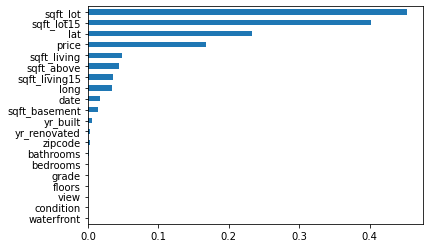

In [5]:
# Show the proportion of unique values per column

# Bathrooms, bedrooms, grade, floors, view, condition, and waterfront to have a very small number 
# of unique values. They may be categorical/ordinal
# Zipcode, year renovated, year built, basement, sqft living, sqft above, sqft living15 are all below 10%

nu_dict = dict(df.nunique())
val_list = list(nu_dict.values())

percent = []
for col, val in zip(df.columns, val_list):
    percent.append(val/len(df[col]))
percent  
unique_per_column = pd.Series(data=percent, index=df.columns)
unique_per_column.drop('id').sort_values(ascending=True).plot(kind='barh')

In [6]:
low_nunique = []
for k,v in nu_dict.items():
    if v < 15:
        low_nunique.append(k)
    else:
        pass
low_nunique

['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

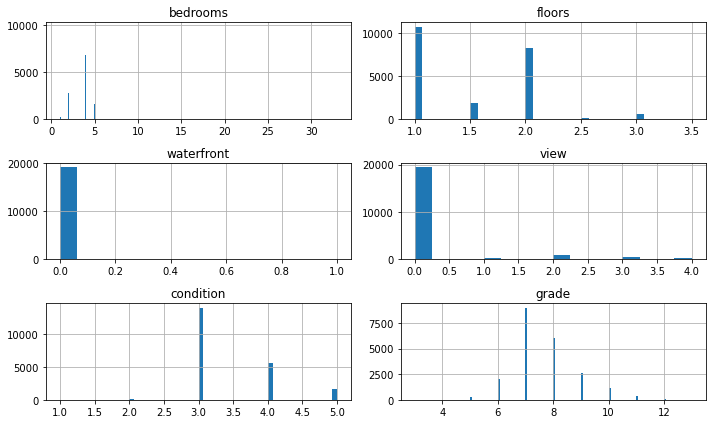

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# It appears all but waterfront are categorical variables with cardinal values
# Waterfront is the only binary variable


df[low_nunique].hist(figsize=(10,6), bins='auto');
# fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12,8))
# for ax, col in zip(axes.flatten(), df[low_nunique]):    
#     ax.hist(x=df[low_nunique])
plt.tight_layout()

<AxesSubplot:>

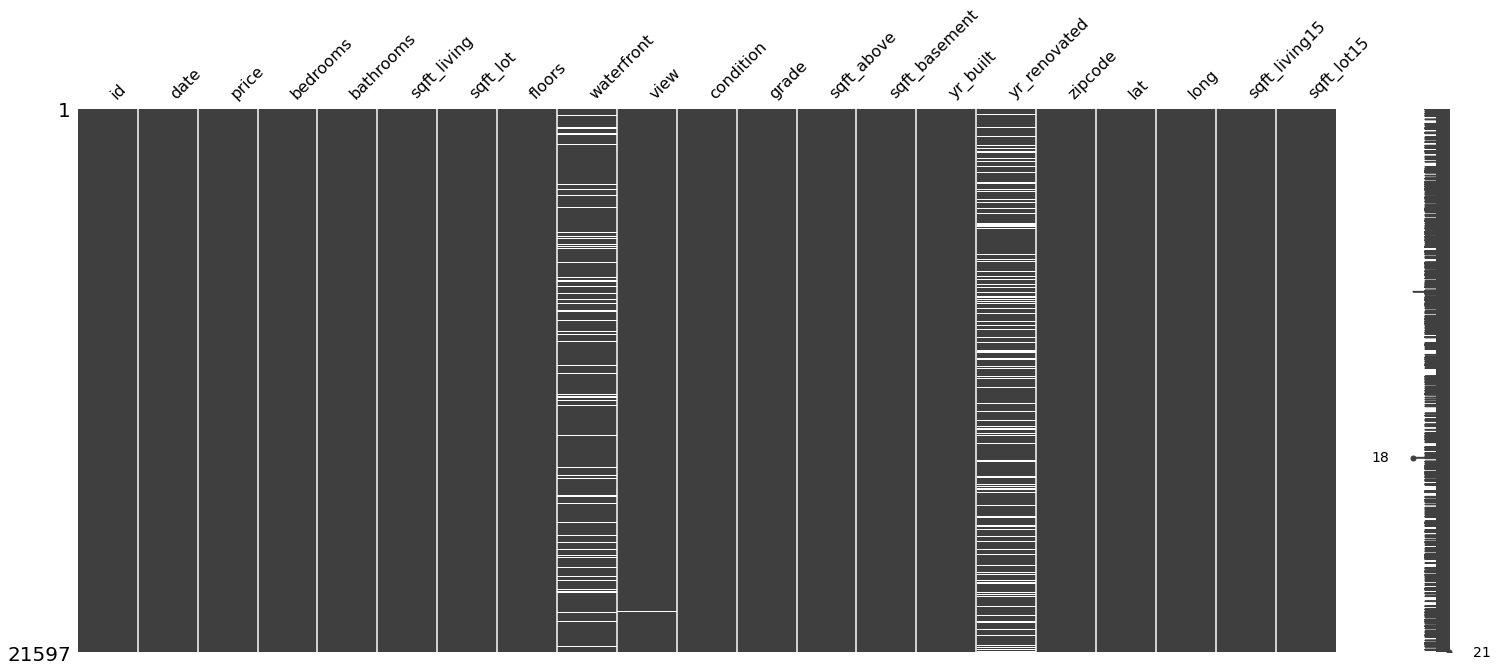

In [8]:
# Start checking for null values

# Waterfront, view, and yr_renovated are the only columns with missing data

import missingno
missingno.matrix(df)

In [9]:
null = df.isna().sum()
null[null>1]

waterfront      2376
view              63
yr_renovated    3842
dtype: int64

In [10]:
print(df['view'].value_counts(1))
df[df['view'].isnull()]

0.00   0.90
2.00   0.04
3.00   0.02
1.00   0.02
4.00   0.01
Name: view, dtype: float64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7,2008000270,2015-01-15,291850.00,3,1.50,1060,9711,1.00,0.00,nan,3,7,1060,0.0,1963,0.00,98198,47.41,-122.31,1650,9711
114,8961960160,2014-10-28,480000.00,4,2.50,3230,16171,2.00,0.00,nan,3,9,2520,710.0,2001,0.00,98001,47.32,-122.25,2640,8517
129,7853210060,2015-04-06,430000.00,4,2.50,2070,4310,2.00,0.00,nan,3,7,2070,0.0,2004,0.00,98065,47.53,-121.85,1970,3748
205,3456000310,2014-08-04,840000.00,4,1.75,2480,11010,1.00,0.00,nan,4,9,1630,850.0,1966,nan,98040,47.54,-122.22,2770,10744
487,1895000260,2014-07-21,207950.00,2,2.00,890,5000,1.00,0.00,nan,3,6,890,0.0,1917,0.00,98118,47.52,-122.26,1860,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19989,148000475,2014-05-28,1400000.00,4,3.25,4700,9160,1.00,0.00,nan,3,11,2520,2180.0,2005,0.00,98116,47.57,-122.41,2240,8700
20148,291310170,2014-08-04,384500.00,3,2.50,1600,2610,2.00,0.00,nan,3,8,1600,0.0,2005,nan,98027,47.53,-122.07,1445,1288
20380,1196003740,2014-09-24,734000.00,5,4.25,4110,42755,2.00,0.00,nan,3,10,2970,1140.0,2000,nan,98023,47.34,-122.34,2730,12750
21057,3448900290,2014-08-28,636230.00,4,2.50,2840,6284,2.00,0.00,nan,3,9,2840,0.0,2013,0.00,98056,47.51,-122.17,2790,7168


In [11]:
print(df['yr_renovated'].value_counts())
df[df['yr_renovated'].isnull()]

0.00       17011
2014.00       73
2003.00       31
2013.00       31
2007.00       30
           ...  
1946.00        1
1959.00        1
1971.00        1
1951.00        1
1954.00        1
Name: yr_renovated, Length: 70, dtype: int64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
12,114101516,2014-05-28,310000.00,3,1.00,1430,19901,1.50,0.00,0.00,4,7,1430,0.0,1927,nan,98028,47.76,-122.23,1780,12697
23,8091400200,2014-05-16,252700.00,2,1.50,1070,9643,1.00,nan,0.00,3,7,1070,0.0,1985,nan,98030,47.35,-122.17,1220,8386
26,1794500383,2014-06-26,937000.00,3,1.75,2450,2691,2.00,0.00,0.00,3,8,1750,700.0,1915,nan,98119,47.64,-122.36,1760,3573
28,5101402488,2014-06-24,438000.00,3,1.75,1520,6380,1.00,0.00,0.00,3,7,790,730.0,1948,nan,98115,47.70,-122.30,1520,6235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21576,1931300412,2015-04-16,475000.00,3,2.25,1190,1200,3.00,0.00,0.00,3,8,1190,0.0,2008,nan,98103,47.65,-122.35,1180,1224
21577,8672200110,2015-03-17,1090000.00,5,3.75,4170,8142,2.00,0.00,2.00,3,10,4170,0.0,2006,nan,98056,47.54,-122.18,3030,7980
21579,1972201967,2014-10-31,520000.00,2,2.25,1530,981,3.00,0.00,0.00,3,8,1480,50.0,2006,nan,98103,47.65,-122.35,1530,1282
21581,191100405,2015-04-21,1580000.00,4,3.25,3410,10125,2.00,0.00,0.00,3,10,3410,?,2007,nan,98040,47.57,-122.22,2290,10125


In [12]:
# Handle waterfront null values

print('Has view of water (Latitude)')
print(df[df['waterfront']==1.0]['lat'].describe())
print('------------------------------------------')
print('Does not have view of water (Latitude)')
print(df[df['waterfront']==0.0]['lat'].describe())
print('------------------------------------------')
print('Has view of water (Price)')
print(df[df['waterfront']==1.0]['price'].describe())
print('------------------------------------------')
print('Does not have view of water')
print(df[df['waterfront']==0.0]['price'].describe())

Has view of water (Latitude)
count   146.00
mean     47.54
std       0.11
min      47.33
25%      47.45
50%      47.55
75%      47.61
max      47.77
Name: lat, dtype: float64
------------------------------------------
Does not have view of water (Latitude)
count   19075.00
mean       47.56
std         0.14
min        47.16
25%        47.47
50%        47.57
75%        47.68
max        47.78
Name: lat, dtype: float64
------------------------------------------
Has view of water (Price)
count       146.00
mean    1717214.73
std     1145384.86
min      285000.00
25%      827500.00
50%     1510000.00
75%     2282500.00
max     7060000.00
Name: price, dtype: float64
------------------------------------------
Does not have view of water
count     19075.00
mean     532641.99
std      344959.18
min       78000.00
25%      320000.00
50%      450000.00
75%      638600.00
max     7700000.00
Name: price, dtype: float64


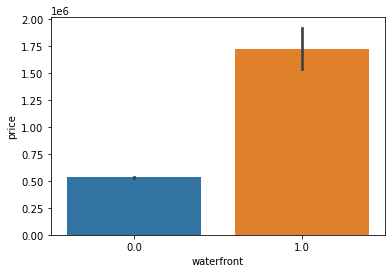

In [13]:
sns.barplot(data=df, x='waterfront', y='price');

In [14]:
mplus_water =len(df[(df['price']>1000000) & df['waterfront']==1.0])
print(f'Number of houses over $1,000,000 with waterfront view:\t{mplus_water}')
mminus_water = len(df[(df['price']<1000000) & df['waterfront']==1.0])
print(f'Number of houses under $1,000,000 with waterfront view:\t{mminus_water}')

Number of houses over $1,000,000 with waterfront view:	96
Number of houses under $1,000,000 with waterfront view:	49


In [15]:
# Going to impute categorical variables the probability that they appear in the dataset
# Begin with waterfront and functionize

# Prior count below:
# 0.00    19075
# 1.00      146
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# Prob of having waterfront view for homes over $1,000,000
print('$1M+ with waterfront');
print(df.loc[df['price']>1000000]['waterfront'].value_counts(1));
print('------------------------------------------')
# Prob of having waterfront view for homes under $1,000,000
print('$1M- with waterfront');
print(df.loc[df['price']<1000000]['waterfront'].value_counts(1))

$1M+ with waterfront
0.00000   0.92666
1.00000   0.07334
Name: waterfront, dtype: float64
------------------------------------------
$1M- with waterfront
0.00000   0.99726
1.00000   0.00274
Name: waterfront, dtype: float64


In [16]:
def impute_cat(df, col):
    val_prob = dict(df[col].value_counts(1))
    prob = list(val_prob.values())
    val = list(val_prob.keys())
    np.random.choice(val, p=prob)
    df[col].fillna(np.random.choice(val, p=prob), inplace=True)
    return df

In [17]:
df['sqft_basement'].replace(to_replace='?', value='0.0',inplace=True)
s = df['sqft_basement']
pd.to_numeric(s, downcast='integer')

0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement, Length: 21597, dtype: int16

In [18]:
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1920.0        1
243.0         1
3000.0        1
143.0         1
283.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [19]:
df['basementyes'] = (df['sqft_basement']!='0.0').map({True:1,
                                                            False: 0})

In [20]:
(df['sqft_basement']=='0.0').sum()

13280

In [21]:
df['basementyes'].value_counts()

0    13280
1     8317
Name: basementyes, dtype: int64

In [22]:
df_1mplus=df.loc[df['price']>1000000]
df_1mminus=df.loc[df['price']<1000000]

In [23]:
df_1mplus =impute_cat(df_1mplus, 'waterfront')

/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [24]:
df_1mminus['waterfront'] =df_1mminus['waterfront'].fillna(0)

<ipython-input-24-d246c886c934>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1mminus['waterfront'] =df_1mminus['waterfront'].fillna(0)


In [25]:
df=pd.concat([df_1mminus, df_1mplus])

In [26]:
impute_cat(df, 'view')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basementyes
0,7129300520,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0.00000,0.00000,3,7,1180,0.0,1955,0.00000,98178,47.51120,-122.25700,1340,5650,0
1,6414100192,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0.00000,3,7,2170,400.0,1951,1991.00000,98125,47.72100,-122.31900,1690,7639,1
2,5631500400,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0.00000,0.00000,3,6,770,0.0,1933,nan,98028,47.73790,-122.23300,2720,8062,0
3,2487200875,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,0.00000,5,7,1050,910.0,1965,0.00000,98136,47.52080,-122.39300,1360,5000,1
4,1954400510,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0.00000,3,8,1680,0.0,1987,0.00000,98074,47.61680,-122.04500,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,7430200100,2014-05-14,1220000.00000,4,3.50000,4910,9444,1.50000,0.00000,0.00000,3,11,3110,1800.0,2007,0.00000,98074,47.65020,-122.06600,4560,11063,1
21577,8672200110,2015-03-17,1090000.00000,5,3.75000,4170,8142,2.00000,0.00000,2.00000,3,10,4170,0.0,2006,nan,98056,47.53540,-122.18100,3030,7980,0
21581,191100405,2015-04-21,1580000.00000,4,3.25000,3410,10125,2.00000,0.00000,0.00000,3,10,3410,0.0,2007,nan,98040,47.56530,-122.22300,2290,10125,0
21584,249000205,2014-10-15,1540000.00000,5,3.75000,4470,8088,2.00000,0.00000,0.00000,3,11,4470,0.0,2008,0.00000,98004,47.63210,-122.20000,2780,8964,0


In [27]:
# Consider 0 to mean the home has not been renovated
# Conservativley determined null values should be considered non-renovated homes

df['yr_renovated'].value_counts().sort_values(ascending=False).nlargest(30)

0.00000       16988
2014.00000       73
2003.00000       31
2013.00000       31
2007.00000       30
2000.00000       29
2005.00000       29
1990.00000       22
2004.00000       22
2009.00000       21
1989.00000       20
2006.00000       20
2002.00000       17
1998.00000       16
1984.00000       16
2010.00000       15
1983.00000       15
2001.00000       15
1999.00000       15
2008.00000       15
1991.00000       15
2015.00000       14
1985.00000       14
1986.00000       14
1987.00000       14
1994.00000       14
1992.00000       13
1993.00000       12
1997.00000       12
1995.00000       12
Name: yr_renovated, dtype: int64

In [28]:
# No null values remaining

df['yr_renovated'].fillna(0, inplace=True)

In [29]:
# Check for duplicate values

In [30]:
# I found duplicates in the id column. I interpreted them as changes in the listing because the characterestics
# were the same outside of the date. I decided to keep 'last' because that reflects the most recent listing

pd.set_option('display.max_rows', 500)

df[df.duplicated(subset=['id'],keep=False)]
df=df.drop_duplicates(subset=['id'], keep='last')

In [31]:
# df.sort_values(by='total_rooms', ascending=False)
df=df.drop(15856)

## Baseline Model

In [32]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

from scipy import stats
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols

In [33]:
def model_summary(df, X_targets, y):
    outcome = y
    x_cols = X_targets
    predictors = '+'.join(x_cols)
    formula = outcome + '~' + predictors
    model = ols(formula=formula, data=df).fit()
    resid1 = model.resid
    
    return model.summary(), sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True);

In [34]:

x_baseline = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15', 'basementyes']


(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.658
 Model:                            OLS   Adj. R-squared:                  0.658
 Method:                 Least Squares   F-statistic:                     2745.
 Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
 Time:                        16:56:28   Log-Likelihood:            -2.9292e+05
 No. Observations:               21387   AIC:                         5.859e+05
 Df Residuals:                   21371   BIC:                         5.860e+05
 Df Model:                          15                                         
 Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
 ------------------------------------------------------------------

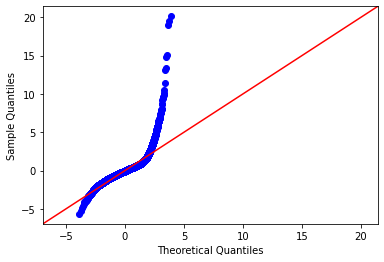

In [35]:
model_summary(df, x_baseline, 'price')

### Baseline Model Conclusion

## New Feature Model

In [36]:
# Total rooms
# Do addition, multiplication would create too large of a SD. ie (2 beds 1 bath=3, 4 beds 1 bath=5)
df['total_rooms'] = df['bedrooms']+df['bathrooms']
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basementyes,total_rooms
0,7129300520,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0.00000,0.00000,3,7,1180,0.0,1955,0.00000,98178,47.51120,-122.25700,1340,5650,0,4.00000
1,6414100192,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0.00000,0.00000,3,7,2170,400.0,1951,1991.00000,98125,47.72100,-122.31900,1690,7639,1,5.25000
2,5631500400,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0.00000,0.00000,3,6,770,0.0,1933,0.00000,98028,47.73790,-122.23300,2720,8062,0,3.00000
3,2487200875,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0.00000,0.00000,5,7,1050,910.0,1965,0.00000,98136,47.52080,-122.39300,1360,5000,1,7.00000
4,1954400510,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0.00000,0.00000,3,8,1680,0.0,1987,0.00000,98074,47.61680,-122.04500,1800,7503,0,5.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,7430200100,2014-05-14,1220000.00000,4,3.50000,4910,9444,1.50000,0.00000,0.00000,3,11,3110,1800.0,2007,0.00000,98074,47.65020,-122.06600,4560,11063,1,7.50000
21577,8672200110,2015-03-17,1090000.00000,5,3.75000,4170,8142,2.00000,0.00000,2.00000,3,10,4170,0.0,2006,0.00000,98056,47.53540,-122.18100,3030,7980,0,8.75000
21581,191100405,2015-04-21,1580000.00000,4,3.25000,3410,10125,2.00000,0.00000,0.00000,3,10,3410,0.0,2007,0.00000,98040,47.56530,-122.22300,2290,10125,0,7.25000
21584,249000205,2014-10-15,1540000.00000,5,3.75000,4470,8088,2.00000,0.00000,0.00000,3,11,4470,0.0,2008,0.00000,98004,47.63210,-122.20000,2780,8964,0,8.75000


In [37]:
# Had erroniously stated 33 bedrooms and 1.5 bathrooms
# df=df.drop(15856)
df.sort_values(by='total_rooms', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basementyes,total_rooms
8537,424049043,2014-08-11,450000.00000,9,7.50000,4050,6504,2.00000,0.00000,0.00000,3,7,4050,0.0,1996,0.00000,98144,47.59230,-122.30100,1448,3866,0,16.50000
13301,627300145,2014-08-14,1150000.00000,10,5.25000,4590,10920,1.00000,0.00000,2.00000,3,9,2500,2090.0,2008,0.00000,98004,47.58610,-122.11300,2730,10400,1,15.25000
12764,1225069038,2014-05-05,2280000.00000,7,8.00000,13540,307752,3.00000,0.00000,4.00000,3,12,9410,4130.0,1999,0.00000,98053,47.66750,-121.98600,4850,217800,1,15.00000
8748,1773100755,2014-08-21,520000.00000,11,3.00000,3000,4960,2.00000,0.00000,0.00000,3,7,2400,600.0,1918,1999.00000,98106,47.55600,-122.36300,1420,4960,1,14.00000
7245,6762700020,2014-10-13,7700000.00000,6,8.00000,12050,27600,2.50000,0.00000,3.00000,4,13,8570,3480.0,1910,1987.00000,98102,47.62980,-122.32300,3940,8800,1,14.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973,5101404170,2014-11-13,200000.00000,1,0.75000,680,9600,1.00000,0.00000,0.00000,3,5,680,0.0,1947,0.00000,98115,47.69640,-122.30600,1580,6624,0,1.75000
9811,3598600049,2015-04-24,224000.00000,1,0.75000,840,7203,1.50000,0.00000,0.00000,3,6,840,0.0,1949,0.00000,98168,47.47560,-122.30100,1560,8603,0,1.75000
8614,6303400395,2015-01-30,325000.00000,1,0.75000,410,8636,1.00000,0.00000,0.00000,2,4,410,0.0,1953,0.00000,98146,47.50770,-122.35700,1190,8636,0,1.75000
10469,7129304375,2014-07-14,202000.00000,1,0.75000,590,5650,1.00000,0.00000,0.00000,3,6,590,0.0,1944,0.00000,98118,47.51810,-122.26700,980,5650,0,1.75000


In [38]:
def distr_(df, col):
    fig, ax = plt.subplots(figsize=(8,7), nrows=3, gridspec_kw={'height_ratios': [2,1,4]});
    mean=df[col].mean()
    median=df[col].median()
    max_=df[col].max()
    min_=df[col].min()
    std_=df[col].std()
    sns.histplot(df[col],alpha=0.5,stat='density',ax=ax[0]);
    sns.kdeplot(df[col],color='green',ax=ax[0]);
    ax[0].set_xlabel(col)
    ax[0].set_title(f'{col} Distribution')
    ax[0].axvline(mean, label=f'Mean: {mean}', c='red')
    ax[0].axvline(median, label=f'median: {median}', c='red', linestyle=':')
    ax[0].legend()
    
    sns.boxplot(data=df, x=col, ax=ax[1]);
    
    sns.scatterplot(data=df, x=df[col], y=df['price']);
    
    fig.tight_layout();
    print(f'{col} Summary')
    print(f'Median: {median}')
    print(f'Mean: {mean:.4}')
    print(f'Max: {max_}')
    print(f'Min: {min_}')
    print(f'Std: {std_:.4}')
    return fig, ax;

total_rooms Summary
Median: 5.5
Mean: 5.49
Max: 16.5
Min: 1.5
Std: 1.463


(<Figure size 576x504 with 3 Axes>,
 array([<AxesSubplot:title={'center':'total_rooms Distribution'}, xlabel='total_rooms', ylabel='Density'>,
        <AxesSubplot:xlabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='price'>], dtype=object))

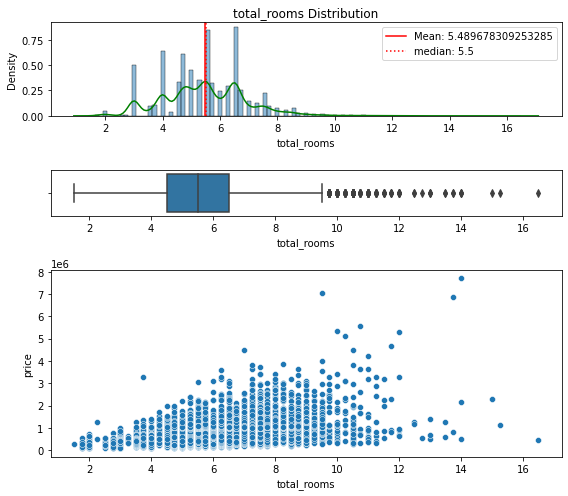

In [39]:
distr_(df, 'total_rooms')

In [40]:
# SQF vs. neighborhood average Living
df['living_vs_neighbor'] = df['sqft_living']/df['sqft_living15']

living_vs_neighbor Summary
Median: 1.0
Mean: 1.054
Max: 6.0
Min: 0.1872791519434629
Std: 0.3203


(<Figure size 576x504 with 3 Axes>,
 array([<AxesSubplot:title={'center':'living_vs_neighbor Distribution'}, xlabel='living_vs_neighbor', ylabel='Density'>,
        <AxesSubplot:xlabel='living_vs_neighbor'>,
        <AxesSubplot:xlabel='living_vs_neighbor', ylabel='price'>],
       dtype=object))

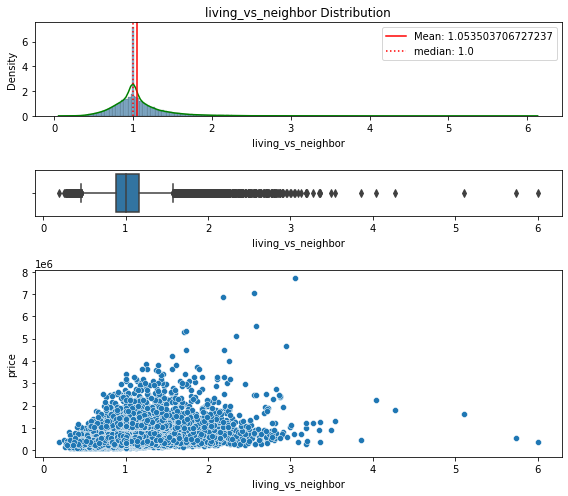

In [41]:
distr_(df, 'living_vs_neighbor')

In [42]:
df['lot_vs_neighbor'] = df['sqft_lot']/df['sqft_lot15']

lot_vs_neighbor Summary
Median: 1.0
Mean: 1.134
Max: 87.52717948717948
Min: 0.054971997700810314
Std: 1.286


(<Figure size 576x504 with 3 Axes>,
 array([<AxesSubplot:title={'center':'lot_vs_neighbor Distribution'}, xlabel='lot_vs_neighbor', ylabel='Density'>,
        <AxesSubplot:xlabel='lot_vs_neighbor'>,
        <AxesSubplot:xlabel='lot_vs_neighbor', ylabel='price'>],
       dtype=object))

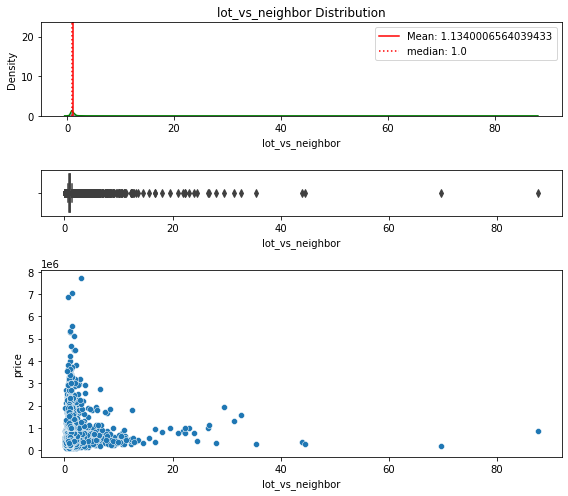

In [43]:
distr_(df, 'lot_vs_neighbor')

In [44]:
# SQF vs. lot size
df['live_lot'] = df['sqft_living']/df['sqft_lot']

live_lot Summary
Median: 0.248
Mean: 0.3244
Max: 4.653846153846154
Min: 0.0006095498431482305
Std: 0.2692


(<Figure size 576x504 with 3 Axes>,
 array([<AxesSubplot:title={'center':'live_lot Distribution'}, xlabel='live_lot', ylabel='Density'>,
        <AxesSubplot:xlabel='live_lot'>,
        <AxesSubplot:xlabel='live_lot', ylabel='price'>], dtype=object))

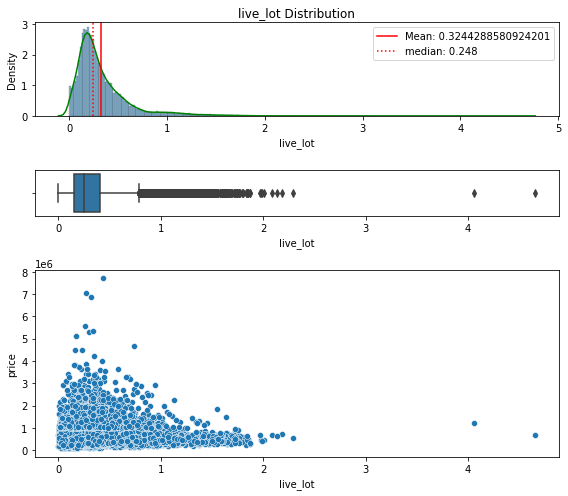

In [45]:
distr_(df, 'live_lot')

In [46]:
df['renovated_yes'] = (df['yr_renovated']!=0).map({True:1,
                                                   False: 0})

<AxesSubplot:xlabel='renovated_yes', ylabel='price'>

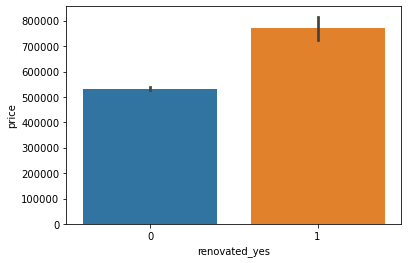

In [47]:
sns.barplot(data=df, x='renovated_yes', y='price')

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.672
 Model:                            OLS   Adj. R-squared:                  0.671
 Method:                 Least Squares   F-statistic:                     2429.
 Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
 Time:                        16:56:39   Log-Likelihood:            -2.9249e+05
 No. Observations:               21387   AIC:                         5.850e+05
 Df Residuals:                   21368   BIC:                         5.852e+05
 Df Model:                          18                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

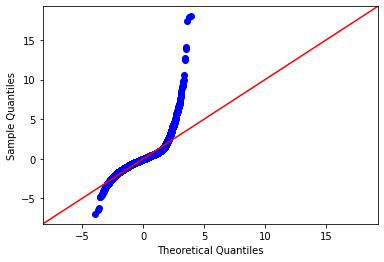

In [48]:
# Run new feature model

X_feats = ['bedrooms', 'bathrooms', 'sqft_living',
           'sqft_lot', 'floors', 'waterfront', 'view',
           'condition', 'grade','sqft_above', 'yr_built',
           'sqft_living15', 'sqft_lot15', 'basementyes',
           'total_rooms', 'living_vs_neighbor', 'lot_vs_neighbor',
           'live_lot', 'renovated_yes']

model_summary(df, X_feats, 'price')

### New Feature Model Conclusion

## Z-Score Outlier Removal

In [49]:
scaler = StandardScaler()
scaler

StandardScaler()

In [50]:
df_scaled = df.copy()

In [51]:
df_scaled.columns
num_cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors','view', 'condition', 'grade',
       'sqft_above', 'yr_built','sqft_living15', 'sqft_lot15',
       'total_rooms', 'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot']

In [52]:
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])
df_scaled

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basementyes,total_rooms,living_vs_neighbor,lot_vs_neighbor,live_lot,renovated_yes
0,7129300520,2014-10-13,221900.00000,-0.41185,-1.45459,-0.98204,-0.22816,-0.91774,0.00000,-0.30530,-0.63136,-0.56451,-0.73673,0.0,-0.54875,0.00000,98178,47.51120,-122.25700,-0.94499,-0.26054,0,-1.01840,-0.53992,-0.10418,-0.42942,0
1,6414100192,2014-12-09,538000.00000,-0.41185,0.17194,0.53098,-0.18985,0.93402,0.00000,-0.30530,-0.63136,-0.56451,0.45812,400.0,-0.68492,1991.00000,98125,47.72100,-122.31900,-0.43431,-0.18785,1,-0.16385,1.45891,-0.14459,0.11312,1
2,5631500400,2015-02-25,180000.00000,-1.51952,-1.45459,-1.42833,-0.12349,-0.91774,0.00000,-0.30530,-0.63136,-1.41822,-1.23157,0.0,-1.29771,0.00000,98028,47.73790,-122.23300,1.06855,-0.17239,0,-1.70204,-2.40571,0.08271,-0.91929,0
3,2487200875,2014-12-09,604000.00000,0.69582,1.14785,-0.13301,-0.24380,-0.91774,0.00000,-0.30530,2.44799,-0.56451,-0.89363,910.0,-0.20831,0.00000,98136,47.52080,-122.39300,-0.91581,-0.28429,1,1.03251,1.21055,-0.10418,0.25105,0
4,1954400510,2015-02-18,510000.00000,-0.41185,-0.15337,-0.43779,-0.16969,-0.91774,0.00000,-0.30530,-0.63136,0.28920,-0.13327,0.0,0.54065,0.00000,98074,47.61680,-122.04500,-0.27381,-0.19282,0,-0.33476,-0.37525,-0.04439,-0.43287,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,7430200100,2014-05-14,1220000.00000,0.69582,1.79846,3.07807,-0.13687,0.00814,0.00000,-0.30530,-0.63136,2.85033,1.59263,1800.0,1.22152,0.00000,98074,47.65020,-122.06600,3.75328,-0.06272,1,1.37433,0.07260,-0.21796,0.72628,0
21577,8672200110,2015-03-17,1090000.00000,1.80349,2.12377,2.27258,-0.16819,0.93402,0.00000,2.31279,-0.63136,1.99662,2.87197,0.0,1.18748,0.00000,98056,47.53540,-122.18100,1.52087,-0.17539,0,2.22888,1.00777,-0.08840,0.69749,0
21581,191100405,2015-04-21,1580000.00000,0.69582,1.47316,1.44532,-0.12048,0.93402,0.00000,-0.30530,-0.63136,1.99662,1.95471,0.0,1.22152,0.00000,98040,47.56530,-122.22300,0.44114,-0.09700,0,1.20342,1.36015,-0.10418,0.04593,0
21584,249000205,2014-10-15,1540000.00000,1.80349,2.12377,2.59913,-0.16949,0.93402,0.00000,-0.30530,-0.63136,2.85033,3.23404,0.0,1.25557,0.00000,98004,47.63210,-122.20000,1.15610,-0.13943,0,2.22888,1.73121,-0.18016,0.84801,0


In [53]:
# Since everything is either continuous or binary, we don't need to one hot encode any variables at the moment

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.672
 Model:                            OLS   Adj. R-squared:                  0.671
 Method:                 Least Squares   F-statistic:                     2301.
 Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
 Time:                        16:56:39   Log-Likelihood:            -2.9249e+05
 No. Observations:               21387   AIC:                         5.850e+05
 Df Residuals:                   21367   BIC:                         5.852e+05
 Df Model:                          19                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

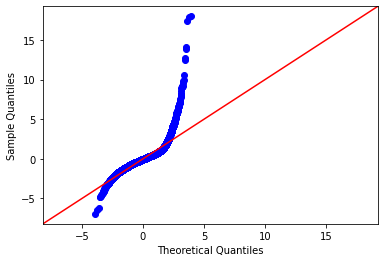

In [54]:
# Run regression with standardized variables. See if there is any differernce
model_summary(df_scaled, X_feats, 'price')

In [55]:
# Confirmed that standardized yields the same results as non-standardized

In [58]:
# Scale Price and add onto outlier df
df_scaled2 = df_scaled.copy()

In [59]:
df_scaled2['price'] = scaler.fit_transform(df_scaled2[['price']])
df_scaled2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basementyes,total_rooms,living_vs_neighbor,lot_vs_neighbor,live_lot,renovated_yes
0,7129300520,2014-10-13,-0.86899,-0.41185,-1.45459,-0.98204,-0.22816,-0.91774,0.00000,-0.30530,-0.63136,-0.56451,-0.73673,0.0,-0.54875,0.00000,98178,47.51120,-122.25700,-0.94499,-0.26054,0,-1.01840,-0.53992,-0.10418,-0.42942,0
1,6414100192,2014-12-09,-0.00863,-0.41185,0.17194,0.53098,-0.18985,0.93402,0.00000,-0.30530,-0.63136,-0.56451,0.45812,400.0,-0.68492,1991.00000,98125,47.72100,-122.31900,-0.43431,-0.18785,1,-0.16385,1.45891,-0.14459,0.11312,1
2,5631500400,2015-02-25,-0.98304,-1.51952,-1.45459,-1.42833,-0.12349,-0.91774,0.00000,-0.30530,-0.63136,-1.41822,-1.23157,0.0,-1.29771,0.00000,98028,47.73790,-122.23300,1.06855,-0.17239,0,-1.70204,-2.40571,0.08271,-0.91929,0
3,2487200875,2014-12-09,0.17101,0.69582,1.14785,-0.13301,-0.24380,-0.91774,0.00000,-0.30530,2.44799,-0.56451,-0.89363,910.0,-0.20831,0.00000,98136,47.52080,-122.39300,-0.91581,-0.28429,1,1.03251,1.21055,-0.10418,0.25105,0
4,1954400510,2015-02-18,-0.08484,-0.41185,-0.15337,-0.43779,-0.16969,-0.91774,0.00000,-0.30530,-0.63136,0.28920,-0.13327,0.0,0.54065,0.00000,98074,47.61680,-122.04500,-0.27381,-0.19282,0,-0.33476,-0.37525,-0.04439,-0.43287,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,7430200100,2014-05-14,1.84764,0.69582,1.79846,3.07807,-0.13687,0.00814,0.00000,-0.30530,-0.63136,2.85033,1.59263,1800.0,1.22152,0.00000,98074,47.65020,-122.06600,3.75328,-0.06272,1,1.37433,0.07260,-0.21796,0.72628,0
21577,8672200110,2015-03-17,1.49380,1.80349,2.12377,2.27258,-0.16819,0.93402,0.00000,2.31279,-0.63136,1.99662,2.87197,0.0,1.18748,0.00000,98056,47.53540,-122.18100,1.52087,-0.17539,0,2.22888,1.00777,-0.08840,0.69749,0
21581,191100405,2015-04-21,2.82749,0.69582,1.47316,1.44532,-0.12048,0.93402,0.00000,-0.30530,-0.63136,1.99662,1.95471,0.0,1.22152,0.00000,98040,47.56530,-122.22300,0.44114,-0.09700,0,1.20342,1.36015,-0.10418,0.04593,0
21584,249000205,2014-10-15,2.71862,1.80349,2.12377,2.59913,-0.16949,0.93402,0.00000,-0.30530,-0.63136,2.85033,3.23404,0.0,1.25557,0.00000,98004,47.63210,-122.20000,1.15610,-0.13943,0,2.22888,1.73121,-0.18016,0.84801,0


In [63]:
df_scaled2.columns
cols_to_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15', 
       'total_rooms', 'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot']

In [76]:
outliers_z = pd.DataFrame()

for col in cols_to_check:
    outliers_z[col] = df_scaled2[col].abs()>3

outliers_z['total'] = outliers_z.any(axis=1)
df_scaledz_orem = df_scaled[~outliers_z['total']].copy()

In [77]:
df_scaledz_orem.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basementyes,total_rooms,living_vs_neighbor,lot_vs_neighbor,live_lot,renovated_yes
count,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000,18739.00000
mean,4642413539.57815,483952.00406,-0.04684,-0.11802,-0.13537,-0.12247,-0.08184,0.00331,-0.17642,0.02538,-0.11964,-0.11325,-0.04140,59.32921,98077.57025,47.55865,-122.21411,-0.09102,-0.12234,0.36501,-0.09092,-0.09671,-0.05894,-0.08101,0.02972
std,2864427156.31319,234698.26149,0.93754,0.89297,0.80788,0.26986,0.95007,0.05743,0.54277,0.99882,0.87434,0.84950,0.98689,338.99128,53.41876,0.14070,0.13789,0.87702,0.33910,0.48145,0.91097,0.80957,0.27328,0.77142,0.16983
min,1000102.00000,82500.00000,-2.62718,-2.10519,-1.86373,-0.34553,-0.91774,0.00000,-0.30530,-2.17104,-2.27193,-1.71434,-2.42115,0.00000,98001.00000,47.15590,-122.51100,-1.99554,-0.44323,0.00000,-2.72750,-2.43218,-0.79723,-1.17798,0.00000
25%,2202500202.50000,312000.00000,-0.41185,-0.80398,-0.74257,-0.24249,-0.91774,0.00000,-0.30530,-0.63136,-0.56451,-0.74880,-0.68492,0.00000,98033.00000,47.46290,-122.32600,-0.74072,-0.28064,0.00000,-0.67658,-0.56570,-0.14893,-0.60972,0.00000
50%,4019301386.00000,434975.00000,-0.41185,-0.15337,-0.25275,-0.18364,-0.91774,0.00000,-0.30530,-0.63136,-0.56451,-0.33845,0.02999,0.00000,98065.00000,47.56950,-122.22800,-0.25922,-0.19187,0.00000,0.00706,-0.16707,-0.10418,-0.29794,0.00000
75%,7348200155.00000,600000.00000,0.69582,0.49724,0.36770,-0.12246,0.93402,0.00000,-0.30530,0.90831,0.28920,0.37364,0.77895,0.00000,98117.00000,47.68050,-122.12800,0.42655,-0.11180,1.00000,0.69069,0.25755,-0.04133,0.24014,0.00000
max,9900000190.00000,1640000.00000,2.91116,2.77438,2.94745,2.87196,2.78577,1.00000,2.31279,2.44799,2.85033,2.99266,1.49387,2015.00000,98199.00000,47.77760,-121.31500,2.99455,2.96184,1.00000,2.91252,2.99458,2.93377,2.99903,1.00000


In [94]:
print(f'Num observations before dropping with Z-score: {len(df_scaled2)}')
print(f'Num observations after dropping with Z-score: {len(df_scaledz_orem)}')
print(f'Num observations removed: {len(df_scaled2)-len(df_scaledz_orem)}')
print(f'Num observations removed as percent of original DF: {(len(df_scaled2)-len(df_scaledz_orem))/len(df_scaled2):.2}')

Num observations before dropping with Z-score: 21387
Num observations after dropping with Z-score: 18739
Num observations removed: 2648
Num observations removed as percent of original DF: 0.12


In [81]:
df_scaledz_orem.drop('sqft_basement', axis=1, inplace=True)

In [83]:
# Run regression to check QQ Plot
df_scaledz_orem.columns
X_ztarg = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'basementyes', 'total_rooms',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes']

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.698
 Model:                            OLS   Adj. R-squared:                  0.698
 Method:                 Least Squares   F-statistic:                     1968.
 Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
 Time:                        17:16:11   Log-Likelihood:            -2.4709e+05
 No. Observations:               18739   AIC:                         4.942e+05
 Df Residuals:                   18716   BIC:                         4.944e+05
 Df Model:                          22                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

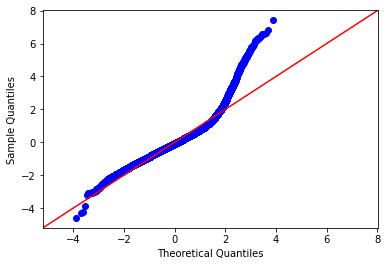

In [95]:
model_summary(df_scaledz_orem, X_ztarg, 'price')

### Z Score Outlier Removal Conclusion
QQ is better and R-Squared improved

## IQR Outlier Removal

In [96]:
def find_outliers_IQR(data):
    """Detects outliers using the 1.5*IQR thresholds.
    Returns a boolean Series where True=outlier"""
    res = data.describe()
    q1 = res['25%']
    q3 = res['75%']
    thresh = 1.5*(q3-q1)
    idx_outliers =(data < (q1-thresh)) | (data > (q3+thresh))
    return idx_outliers

In [97]:
df_iqr = df.copy()

In [99]:
df_iqr.drop(['sqft_basement', 'zipcode', 'lat', 'long'], axis=1, inplace=True)

In [117]:
df_iqr.columns
iqr_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot','sqft_above', 'yr_built',
       'sqft_living15', 'sqft_lot15', 'total_rooms',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot']

In [118]:
iqr_outliers = pd.DataFrame()
for col in iqr_check:
    iqr_outliers[col]=find_outliers_IQR(df_iqr[col])
iqr_outliers['total'] = iqr_outliers.any(axis=1)
df_iqr2 = df_iqr[~iqr_outliers['total']].copy()

In [120]:
df_iqr2['renovated_yes'].value_counts(1)

0   0.97513
1   0.02487
Name: renovated_yes, dtype: float64

In [121]:
print(f'Num observations before dropping with IQR: {len(df_iqr)}')
print(f'Num observations after dropping with IQR: {len(df_iqr2)}')
print(f'Num observations removed: {len(df_iqr)-len(df_iqr2)}')
print(f'Num observations removed as percent of original DF: {(len(df_iqr)-len(df_iqr2))/len(df_iqr):.2}')

Num observations before dropping with IQR: 21387
Num observations after dropping with IQR: 13389
Num observations removed: 7998
Num observations removed as percent of original DF: 0.37


In [122]:
df_iqr2.columns
iqr_pred = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15', 'basementyes', 'total_rooms',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes']

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  price   R-squared:                       0.585
 Model:                            OLS   Adj. R-squared:                  0.585
 Method:                 Least Squares   F-statistic:                     992.5
 Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
 Time:                        17:33:42   Log-Likelihood:            -1.7624e+05
 No. Observations:               13389   AIC:                         3.525e+05
 Df Residuals:                   13369   BIC:                         3.527e+05
 Df Model:                          19                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------

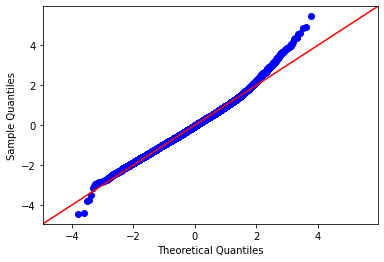

In [123]:
model_summary(df_iqr2, iqr_pred, 'price')

### IQR Outlier Removal Conclusion
Our R Squared Decreased but our QQ Plot is significantly improved
Time to begin more feature engineering and adding checks to hone the model

## Check to One Hot Encode Certain ordinal Variables